In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('white')

In [3]:
df_winedata = pd.read_csv('winequality-red.csv',sep = ';')
df_winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


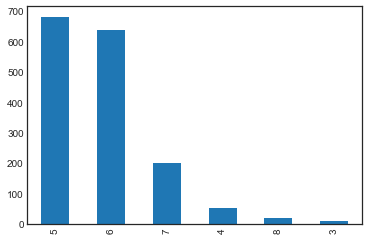

In [4]:
df_winedata.quality.value_counts().plot(kind = 'bar')

# Group by

In [5]:
#group by 是按照某一个列的每个取值分别进行归类
dfwine_group = df_winedata.groupby(df_winedata['quality'])
dfwine_group.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [6]:
dfwine_criticAcid = dfwine_group['citric acid'].mean()

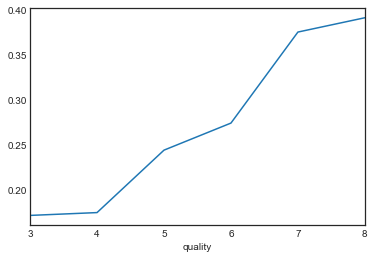

In [7]:
dfwine_criticAcid.plot()

# 对两个columns进行Groupby

In [8]:
Titanic = pd.read_csv('train.csv',sep = ',')
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#group by可以根据多个列进行分类, unstack()对分类结果进行解包显示
Titanic['Survived'].groupby([Titanic['Sex'],Titanic['Pclass']]).mean().unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


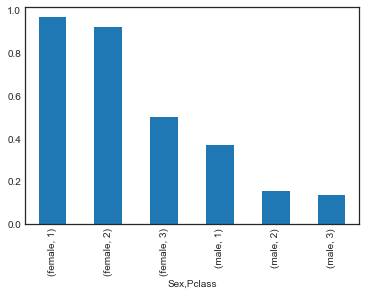

In [10]:
Titanic['Survived'].groupby([Titanic['Sex'],Titanic['Pclass']]).mean().plot('bar')

In [11]:
Titanic['Survived'].groupby([Titanic['Sex'],Titanic['Pclass']]).size()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Survived, dtype: int64

# 如何遍历一个groupby

In [12]:
for group_name,group in dfwine_group: #groupby的返回的值里边具有 这几个属性
    print(group_name) # 显示在第一行的
    print(group)

3
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
459            11.6             0.580         0.66            2.20      0.074   
517            10.4             0.610         0.49            2.10      0.200   
690             7.4             1.185         0.00            4.25      0.097   
832            10.4             0.440         0.42            1.50      0.145   
899             8.3             1.020         0.02            3.40      0.084   
1299            7.6             1.580         0.00            2.10      0.137   
1374            6.8             0.815         0.00            1.20      0.267   
1469            7.3             0.980         0.05            2.10      0.061   
1478            7.1             0.875         0.05            5.70      0.082   
1505            6.7             0.760         0.02            1.80      0.078   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
459                  10.0    

In [13]:
for (sex,Pclass), group in Titanic['Survived'].groupby([Titanic['Sex'],Titanic['Pclass']]): 
    print('Pclass = ',Pclass,'Sex = ',sex) #注意这里的groupby()里的前后顺序和返回值的顺序是一样的

Pclass =  1 Sex =  female
Pclass =  2 Sex =  female
Pclass =  3 Sex =  female
Pclass =  1 Sex =  male
Pclass =  2 Sex =  male
Pclass =  3 Sex =  male


# DataFrame使用字典的groupby

In [14]:
goods = {'apple':'fruit','orange':'fruit','cucumber':'veg','banana':'fruit','potato':'veg','xx':'x'}

In [15]:
data = pd.DataFrame(np.random.randn(5,5),columns = ['apple','orange','cucumber','banana','potato'],
                   index = ['Mon.','Tues.','Weds.','Thur.','Fri.'])
data

,apple,orange,cucumber,banana,potato
Mon.,0.546071,0.562074,-2.735314,2.325646,-0.042351
Tues.,0.577394,-0.404318,-0.905168,1.759230,-0.056920
Weds.,-0.025227,0.608023,1.299278,-0.715704,0.023136
Thur.,-0.672042,-1.281869,-0.960230,0.184334,-0.618979
Fri.,-0.070160,0.138046,-0.663740,0.007729,0.057441


In [16]:
groupby_goods = data.groupby(goods,axis = 1)
groupby_goods

In [17]:
for name,group in groupby_goods:
    print(name)
    print(group)
    print('\n')

fruit
          apple    orange    banana
Mon.   0.546071  0.562074  2.325646
Tues.  0.577394 -0.404318  1.759230
Weds. -0.025227  0.608023 -0.715704
Thur. -0.672042 -1.281869  0.184334
Fri.  -0.070160  0.138046  0.007729


veg
       cucumber    potato
Mon.  -2.735314 -0.042351
Tues. -0.905168 -0.056920
Weds.  1.299278  0.023136
Thur. -0.960230 -0.618979
Fri.  -0.663740  0.057441




In [18]:
groupby_goods.sum(axis = 0)

,fruit,veg
Mon.,3.433791,-2.777665
Tues.,1.932306,-0.962088
Weds.,-0.132908,1.322414
Thur.,-1.769577,-1.579210
Fri.,0.075615,-0.606299


# agg是对dataframe使用某种函数

In [19]:
def High_Low(arr):
    return max(arr) - min(arr)
dfwine_group.agg(High_Low)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [20]:
dfwine_group.agg('var')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,3.136000,0.109730,0.062832,1.964472,0.004388,95.333333,283.211111,0.000004,0.020751,0.014889,0.669139
4,2.645907,0.048448,0.040413,3.202083,0.005805,81.467344,760.842525,0.000002,0.032921,0.057308,0.873806
5,2.446058,0.027159,0.032401,1.848927,0.002884,120.021798,1368.490614,0.000003,0.022686,0.029262,0.542463
6,3.232260,0.025909,0.038067,2.078141,0.001565,98.821718,626.913975,0.000004,0.023714,0.025170,1.101742
7,3.969990,0.021090,0.037804,1.881038,0.000868,103.535823,1101.656160,0.000005,0.022530,0.018398,0.925315
8,4.492941,0.021000,0.039810,1.677124,0.000136,124.447712,646.849673,0.000006,0.040257,0.013312,1.498203


# 新建一个列,直接键入新列名

In [21]:
df_winedata['pH/quality'] = df_winedata['pH'] / df_winedata['quality']
df_winedata

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pH/quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.702000
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.640000
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.652000
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.526667
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.702000
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0.702000
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,0.660000
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,0.484286
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,0.480000
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0.670000


In [22]:
df_winedata.pivot_table(index = ['alcohol']) #默认计算平均值

,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,pH/quality,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
alcohol,,,,,,,,,,,,
8.400000,0.137500,0.615000,1.000100,12.350000,5.500000,3.010000,0.765000,4.500000,1.950000,0.710000,15.500000,0.460000
8.500000,0.169000,0.380000,0.999140,10.000000,27.000000,3.150000,0.630000,5.000000,1.600000,0.650000,90.000000,0.380000
8.700000,0.070000,0.445000,0.997750,8.050000,21.500000,3.330000,0.555000,6.000000,2.100000,0.810000,40.000000,0.330000
8.800000,0.205000,0.500000,1.002420,9.900000,48.000000,3.160000,0.632000,5.000000,13.800000,0.750000,82.000000,0.500000
9.000000,0.113100,0.295667,0.998417,8.793333,16.466667,3.287667,0.624661,5.400000,3.060000,0.605667,50.200000,0.586833
9.050000,0.082000,0.200000,0.995850,6.900000,9.000000,3.390000,0.847500,4.000000,1.900000,0.430000,23.000000,0.480000
9.100000,0.130739,0.318261,0.997451,8.130435,15.043478,3.219130,0.626696,5.217391,2.230435,0.700000,57.217391,0.594783
9.200000,0.104167,0.282917,0.997589,8.391667,17.513889,3.230000,0.622581,5.250000,2.886806,0.655139,56.125000,0.534097
9.233333,0.074000,0.210000,0.998420,6.900000,16.000000,3.530000,0.588333,6.000000,4.100000,0.720000,65.000000,0.840000


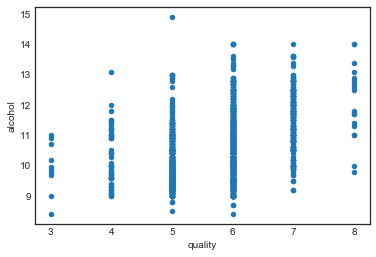

In [23]:
%matplotlib inline
df_winedata.plot(kind = 'scatter',x = 'quality',y = 'alcohol')

# 使用groupby对上面的数据进行进一步处理quality为横坐标，alcohol为纵坐标

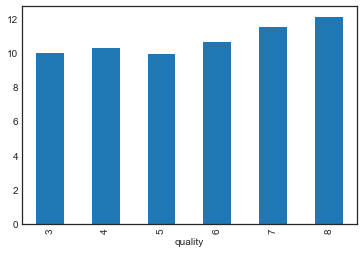

In [26]:
df_winedata.groupby([df_winedata.quality]).mean().alcohol.plot(kind = 'bar',y = 'alcohol')
